# To Mail or Not Mail Prediction
We are a medium Insurance Firm and one of  our critical function is targeting prospective clients and customer with the aim of informing them about our various products and services. The conduit for conveying the information to prospective customers is primarily by e-mails. From our preliminary investigation we observed that quite a couple of people do not open the mails and those that bother to open the direct marketing e-mail they often go ahead and unsubscribe altogether.

As a responsible corporate organization we hold our customers to high esteem and would avoid any behaviour/attitude that may portray us in bad light before customers especially prospective customers. To this end we would want to apply machine learning to solve this problem of sending direct marketing e-mails to prospective clients/customers that are interested in our products and services and who have the capacity to transition from prospective customers to loyal customers/buyers.
We would build a supervised model that would be base on historical data of customer behaviour and reaction to our periodic direct email marketing campaigns 

## Formal Problem Statement
We want to predict which customer should be sent the direct marketing emails and those that should not be sent the direct marketing e-mail. In other words, rather than guess and risk the chance of tormenting customers with unwanted mails that would end up as 'spam mails', we would invest time and efforts into creating a machine learning model that can predict the most likely customer that would not only read our  direct marketing emails but has the capacity/ interest in purchasing our products and services. According to our data the ground truth is under the variable of where or not a customer has a caravan insurance policy(V86)



## Data Dictionary

In [66]:
import os
os.chdir('/Users/ajakaiye/Documents/data')

In [67]:
print(open('data_dictionary.txt',encoding= 'ISO-8859-1').read())


DATADICTIONARY

Nr Name Description Domain

1 MOSTYPE Customer Subtype see L0

2 MAANTHUI Number of houses 1  10

3 MGEMOMV Avg size household 1  6

4 MGEMLEEF Avg age see L1

5 MOSHOOFD Customer main type see L2

6 MGODRK Roman catholic see L3

7 MGODPR Protestant ...

8 MGODOV Other religion

9 MGODGE No religion

10 MRELGE Married

11 MRELSA Living together

12 MRELOV Other relation

13 MFALLEEN Singles

14 MFGEKIND Household without children

15 MFWEKIND Household with children

16 MOPLHOOG High level education

17 MOPLMIDD Medium level education

18 MOPLLAAG Lower level education

19 MBERHOOG High status

20 MBERZELF Entrepreneur

21 MBERBOER Farmer

22 MBERMIDD Middle management

23 MBERARBG Skilled labourers

24 MBERARBO Unskilled labourers

25 MSKA Social class A

26 MSKB1 Social class B1

27 MSKB2 Social class B2

28 MSKC Social class C

29 MSKD Social class D

30 MHHUUR Rented house

31 MHKOOP Home owners

32 MAUT1 1 car

33 MAUT2 2 cars

34 MAUT0 No car

35 MZFONDS Nation

## Load Libraries and Package

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost
%matplotlib inline

In [69]:
pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Load Data Set

In [70]:
insur_train = pd.read_csv('carvan_train.csv')
insur_test = pd.read_csv('carvan_test.csv')

In [71]:
insur_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,33,1,4,2,8,0,6,0,3,5,0,4,1,1,8,2,2,6,0,0,1,2,6,1,0,2,1,5,3,1,8,8,1,1,8,1,3,3,3,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,2,2,1,4,5,5,4,0,5,0,0,4,0,0,4,3,0,2,1,3,6,9,0,0,7,2,1,1,5,4,0,6,8,2,0,0,6,0,4,0,0,0,0,0,3,0,0,0,4,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,2,3,2,3,6,2,4,4,2,1,1,3,2,2,1,1,5,2,1,1,8,6,2,2,6,3,2,4,3,1,0,3,5,2,0,0,6,0,0,0,0,0,0,0,4,0,0,0,4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,4,1,2,4,4,2,4,4,2,1,1,5,1,2,3,1,3,2,2,3,6,7,2,1,7,2,2,5,3,1,0,4,4,2,0,0,5,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,0,0,0,6,3,0,0,9,0,0,0,2,4,4,0,0,0,7,2,9,0,7,2,0,9,0,5,4,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [72]:
insur_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
#from the shape of the data set, we can see that the target variable,V86, is not in the test data set.
#The implication of this is that evaluation of performamce of models would be base on the validation set
#Also the dimensionality is relatively high thus in order for our model not to suffer from course of dimensionality
# we would apply principal component analysis
insur_test.shape, insur_train.shape

((4000, 85), (5822, 86))

In [74]:
# check fpr missing values
missg_value = insur_train.isnull().sum()
missg_val_test = insur_test.isnull().sum()
print(" Number of missing values in train data is:",missg_value[1])
print(" Number of missing values in test data is:",missg_val_test[1])

 Number of missing values in train data is: 0
 Number of missing values in test data is: 0


In [75]:
# check descritive statistics
insur_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,5822.0,24.253349,12.846706,1.0,10.0,30.0,35.0,41.0
V2,5822.0,1.110615,0.405842,1.0,1.0,1.0,1.0,10.0
V3,5822.0,2.678805,0.789835,1.0,2.0,3.0,3.0,5.0
V4,5822.0,2.991240,0.814589,1.0,2.0,3.0,3.0,6.0
V5,5822.0,5.773617,2.856760,1.0,3.0,7.0,8.0,10.0
V6,5822.0,0.696496,1.003234,0.0,0.0,0.0,1.0,9.0
V7,5822.0,4.626932,1.715843,0.0,4.0,5.0,6.0,9.0
V8,5822.0,1.069907,1.017503,0.0,0.0,1.0,2.0,5.0
V9,5822.0,3.258502,1.597647,0.0,2.0,3.0,4.0,9.0
V10,5822.0,6.183442,1.909482,0.0,5.0,6.0,7.0,9.0


## Feature Engineering
Our feature engineering would be caried out on two forms/portions of our  data set:
 1. scaled portion of data set
 2. PCA portion of data set


In [76]:
#extract target variable from train data and named data set accordingly
mail_target = insur_train['V86'] # the target variable
scaled_insure_train =insur_train.drop(['V86'], axis= 1)
scaled_insure_test = insur_test
pca_insure_train = scaled_insure_train
pca_insure_test = insur_test

#scale data
scaled_insure_test = pd.DataFrame(StandardScaler().fit_transform(scaled_insure_test), columns= scaled_insure_test.columns)
scaled_insure_train = pd.DataFrame(StandardScaler().fit_transform(scaled_insure_train), columns= scaled_insure_train.columns)

# get pca of data
pca = PCA(n_components=85)

pca_insure_test = pd.DataFrame(pca.fit_transform(scaled_insure_test), columns=pca_insure_test.columns)
pca_insure_train = pd.DataFrame(pca.fit_transform(scaled_insure_train), columns=pca_insure_train.columns)

print('The scaled portion of the train data has {} rows, and {} columns'.format(scaled_insure_train.shape[0], scaled_insure_train.shape[1]))
print('The scaled portion of the test data has {} rows, and {} columns'.format(scaled_insure_test.shape[0], scaled_insure_test.shape[1]))
print('=' * 20)
print('The PCA portion of the train data has {} rows, and {} columns'.format(pca_insure_train.shape[0], pca_insure_train.shape[1]))
print('The PCA portion of the test data has {} rows, and {} columns'.format(pca_insure_test.shape[0], pca_insure_test.shape[1]))




The scaled portion of the train data has 5822 rows, and 85 columns
The scaled portion of the test data has 4000 rows, and 85 columns
The PCA portion of the train data has 5822 rows, and 85 columns
The PCA portion of the test data has 4000 rows, and 85 columns


In [77]:
# there is some imbalance in the target variable
mail_target.value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [78]:
#the mean and standard deviation correspond to 0 & 1 respectively
scaled_insure_train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,5822.0,-7.749822e-17,1.000086,-1.810219,-1.109590,0.447363,0.836602,1.303687
V2,5822.0,-1.614038e-16,1.000086,-0.272580,-0.272580,-0.272580,-0.272580,21.905439
V3,5822.0,-2.099164e-16,1.000086,-2.125697,-0.859500,0.406697,0.406697,2.939090
V4,5822.0,2.154084e-16,1.000086,-2.444683,-1.216964,0.010755,0.010755,3.693911
V5,5822.0,-2.929067e-17,1.000086,-1.671134,-0.970980,0.429328,0.779405,1.479559
V6,5822.0,-1.220444e-17,1.000086,-0.694311,-0.694311,-0.694311,0.302552,8.277450
V7,5822.0,7.932889e-17,1.000086,-2.696827,-0.365410,0.217444,0.800298,2.548861
V8,5822.0,-1.403511e-17,1.000086,-1.051594,-1.051594,-0.068711,0.914172,3.862821
V9,5822.0,9.519466e-17,1.000086,-2.039739,-0.787790,-0.161816,0.464159,3.594031
V10,5822.0,-1.476738e-16,1.000086,-3.238560,-0.619824,-0.096077,0.427670,1.475164


In [79]:
# view pca
pca_insure_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
0,0.550707,3.410686,-0.804213,-1.029871,-0.083947,0.258962,-0.195425,-0.094469,0.133187,-0.623486,-0.586382,0.155148,0.065767,-0.727373,0.096242,-0.049577,0.145565,-0.407345,0.139133,0.102122,0.106827,-0.398606,0.175686,0.700955,0.090270,0.021323,-1.747827,0.314144,1.878930,-0.294322,-0.027976,-1.173000,-0.266735,-0.662924,-0.385824,0.081261,-0.476130,-0.534936,-0.739773,-0.378409,1.100672,-0.919829,-0.282885,-0.374670,0.381076,-0.279533,0.922478,-0.675654,0.269538,0.277479,0.448840,0.047513,-0.000442,-0.106929,-0.013094,0.228164,0.271298,-0.467110,-0.007282,0.111772,-0.091996,0.091260,0.074688,-0.231394,0.025810,-0.011746,-0.007078,-0.035094,-0.227580,-0.018105,0.019515,0.028285,0.002088,-0.052119,-0.143520,0.023370,-0.120863,0.003183,0.029652,-0.047551,0.197733,-0.007919,0.044500,0.009593,9.254238e-07
1,-0.576122,0.025922,-0.404458,-2.059648,0.863661,-0.604844,-1.949084,-0.633307,-0.236770,1.223139,0.683714,-1.265696,1.047486,0.098886,0.325123,-0.069263,-0.087605,0.793572,-0.580997,-0.278893,-1.413507,0.044995,0.378024,-0.317005,-0.281874,0.525566,-1.559975,-0.730649,-0.144250,-1.588908,-1.478042,0.123638,1.072291,1.557329,-0.417932,-0.521290,0.428341,-0.599058,0.172073,0.093191,-0.283228,1.808107,0.386924,0.888312,-0.705900,-1.004511,-0.566084,0.104599,0.256117,-0.459221,0.946912,-0.093778,0.131069,-0.040434,-0.041769,-0.125856,-0.204036,0.407395,0.017416,-0.136563,0.188501,-0.027752,-0.061300,0.103005,-0.016428,-0.019683,-0.036023,0.037034,0.269288,-0.011493,-0.041104,-0.006275,-0.003484,-0.039583,0.023683,0.403778,0.205379,-0.108092,0.653086,1.120670,0.382806,-0.002846,-0.137838,0.006787,-6.488777e-04
2,2.871990,-1.903902,0.138243,-2.445421,2.777318,-2.679845,-1.821069,0.834435,-0.370453,-0.184450,-0.161689,-0.617054,0.235354,-0.345033,0.114187,-0.211777,0.167581,0.079521,-0.382726,0.246596,-0.083012,0.378153,0.957711,0.329520,0.133726,0.060939,-0.333530,-0.579940,-0.308827,-0.973224,1.297456,-1.075647,0.625622,-0.760006,-0.072791,0.029802,-0.724382,1.266007,0.600049,-0.001967,0.284080,0.490660,0.304506,0.543621,0.554247,-0.192128,-0.892436,0.694608,0.540598,0.668491,-0.116733,-0.502006,0.152578,-0.061627,0.030690,-0.130403,-0.215503,0.388641,-0.030262,-0.110719,0.277019,-0.056381,0.029497,-0.189970,-0.074974,0.015509,-0.038610,0.015560,0.127174,-0.001625,-0.002630,0.037540,0.035759,-0.000180,-0.055757,-0.060896,-0.025697,-0.022811,-0.251001,0.089428,-0.082904,-0.000794,-0.099142,-0.003025,3.632410e-03
3,-1.554568,-1.175751,-0.575601,-0.362423,1.614971,-1.457542,0.337027,-0.425847,0.656148,-0.872591,-1.112938,0.203122,-0.552598,-1.348831,-0.430368,-0.423740,-0.071531,0.309686,-0.056345,0.072683,0.262076,0.084667,0.071800,-0.295754,0.452947,-0.154116,-0.919004,0.589528,0.492088,0.926174,0.494982,-1.312165,-1.054157,0.241686,-0.053973,0.393226,-0.582339,-0.011202,0.284445,-0.415111,0.995414,-1.069652,-0.386701,-0.065193,0.931152,0.493047,-1.084716,-0.895645,-0.388583,-0.206136,-0.331850,-0.112507,-0.498466,0.055707,-0.010448,-0.226495,-0.207146,0.311945,-0.013456,-0.032582,0.186532,-0.043425,0.007854,-0.162014,-0.090581,-0.007007,-0.031426,-0.045025,0.190165,-0.070119,0.013693,0.067637,0.118786,-0.077195,-0.224452,-0.058928,-0.289388,-0.016775,0.010497,0.081730,-0.149946,-0.006637,0.176736,-0.008019,2.384704e-03
4,-4.346824,-0.197035,0.976670,1.252781,-3.041040,1.343599,-0.377780,-1.154248,0.539118,0.911733,-0.194303,-0.118616,0.770059,0.013965,-0.285223,-0.571327,1.304679,0.380157,-0.515646,-0.036117,-3.220091,0.741111,-0.382638,2.327766,-2.336163,-2.398921,-4.831673,1.866023,-2.143721,-0.490887,2.187191,0.349805,0.487678,-2.778381,0.407154,1.797177,0.450412,-1.299512,1.263243,-1.219069,1.073186,-

In [80]:
#check explained variance
pca.explained_variance_

array([9.35289822e+00, 4.91267735e+00, 3.98971676e+00, 3.38039309e+00,
       3.03686197e+00, 2.74251824e+00, 2.28137696e+00, 2.24084352e+00,
       2.18912847e+00, 2.10920104e+00, 2.01229652e+00, 2.00105073e+00,
       1.95189448e+00, 1.91382714e+00, 1.84935680e+00, 1.82319839e+00,
       1.77713809e+00, 1.74330895e+00, 1.73520126e+00, 1.69902533e+00,
       1.63028940e+00, 1.59553933e+00, 1.53765907e+00, 1.42358310e+00,
       1.37717607e+00, 1.35722523e+00, 1.28120982e+00, 1.23679344e+00,
       1.20826653e+00, 1.18019196e+00, 1.13914676e+00, 1.06219155e+00,
       9.84243762e-01, 9.31334834e-01, 8.79392734e-01, 8.77236094e-01,
       8.18664424e-01, 8.08429445e-01, 7.62277866e-01, 7.42151985e-01,
       6.98460681e-01, 6.66171565e-01, 6.18141763e-01, 5.97375676e-01,
       5.57940944e-01, 4.68740581e-01, 4.58354847e-01, 3.86904415e-01,
       3.36241854e-01, 3.20881397e-01, 1.90727783e-01, 1.73370476e-01,
       1.52484939e-01, 1.48598860e-01, 1.39873376e-01, 1.29367082e-01,
      

In [81]:
#check explained variance ratio
pca.explained_variance_ratio_

array([1.10015197e-01, 5.77862769e-02, 4.69297821e-02, 3.97624995e-02,
       3.57216512e-02, 3.22593786e-02, 2.68351188e-02, 2.63583368e-02,
       2.57500289e-02, 2.48098677e-02, 2.36700104e-02, 2.35377298e-02,
       2.29595202e-02, 2.25117460e-02, 2.17534018e-02, 2.14457086e-02,
       2.09039158e-02, 2.05059943e-02, 2.04106260e-02, 1.99851001e-02,
       1.91765809e-02, 1.87678268e-02, 1.80869995e-02, 1.67451598e-02,
       1.61992886e-02, 1.59646131e-02, 1.50704677e-02, 1.45480118e-02,
       1.42124588e-02, 1.38822265e-02, 1.33994247e-02, 1.24942247e-02,
       1.15773495e-02, 1.09549984e-02, 1.03440198e-02, 1.03186520e-02,
       9.62969186e-03, 9.50930103e-03, 8.96643453e-03, 8.72970014e-03,
       8.21577308e-03, 7.83596637e-03, 7.27100694e-03, 7.02674200e-03,
       6.56288366e-03, 5.51364787e-03, 5.39148375e-03, 4.55103482e-03,
       3.95510706e-03, 3.77442684e-03, 2.24347086e-03, 2.03930233e-03,
       1.79363233e-03, 1.74792160e-03, 1.64528649e-03, 1.52170425e-03,
      

### PCA; Variance Report

In [82]:
pd.set_option('display.max_row',100)
#determine components
data = {"Variance":pca.explained_variance_, "%Variance_ratio":pca.explained_variance_ratio_*100}
var_report = pd.DataFrame(data)
var_report['Cumsum'] = var_report['%Variance_ratio'].cumsum()
print('Number of obervation n = {}'.format(pca.n_samples_))
var_report



Number of obervation n = 5822


,Variance,%Variance_ratio,Cumsum
0,9.352898,11.001520,11.001520
1,4.912677,5.778628,16.780147
2,3.989717,4.692978,21.473126
3,3.380393,3.976250,25.449376
4,3.036862,3.572165,29.021541
5,2.742518,3.225938,32.247479
6,2.281377,2.683512,34.930990
7,2.240844,2.635834,37.566824
8,2.189128,2.575003,40.141827
9,2.109201,2.480987,42.622814


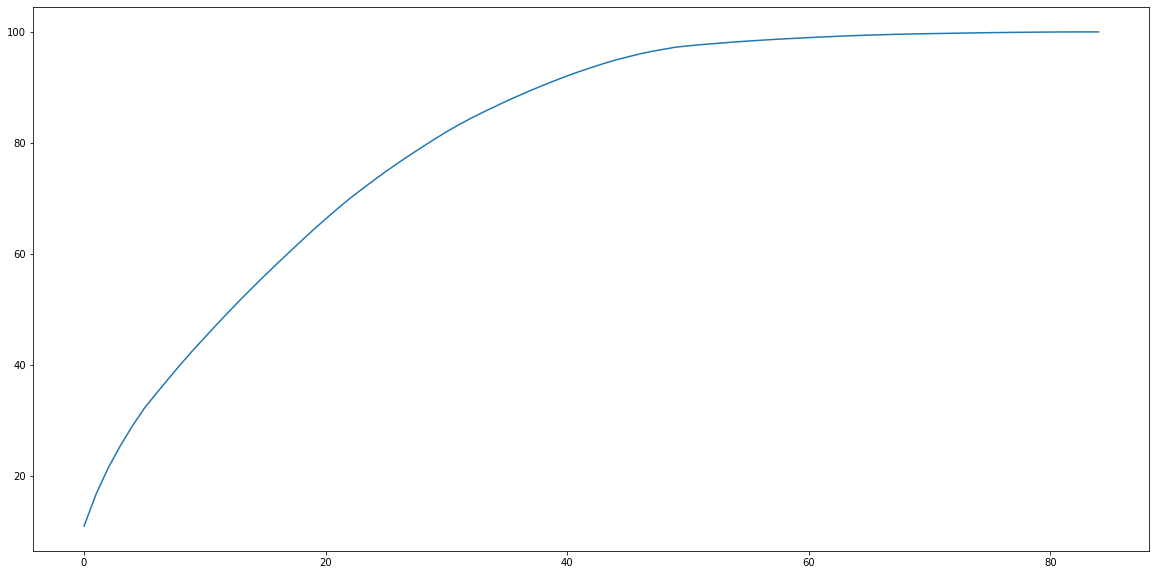

In [83]:
plt.plot(var_report['Cumsum']);

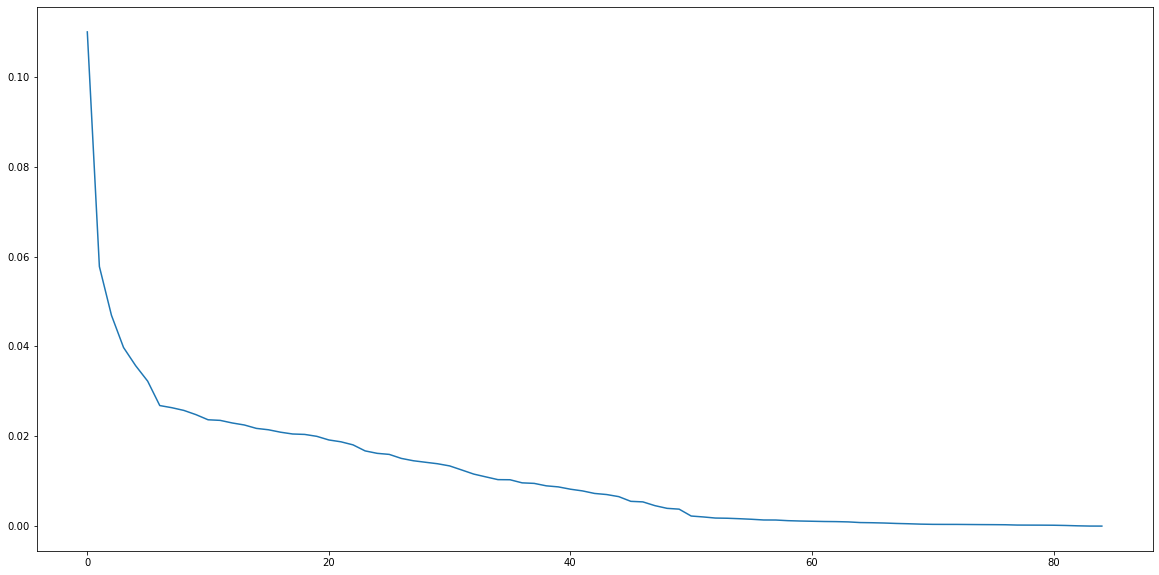

In [84]:
#scree plot rom another angle
plt.plot(pca.explained_variance_ratio_)

### Decision: The Ideal number of Components
Looking at the scree plot, at  53rd component, the respective cummulative explained variance ratio is 98%! 53 components from 85 feature with approximate 2% loss may appear impressive, we would rather start experiemnting from 40 components with a respective cummulative variance rato of 92.07% and a loss of approximately 8%! An 8% loss for 50% of orginal number of  features with a cummulative explained variance ratio of 92.07% is not a bad place to start.

In [85]:
# choose the first 40 components
pca_train_forty = pca_insure_train.iloc[:,0:40]
pca_test_forty = pca_insure_test.iloc[:,0:40]


In [86]:
# verify the shape of pca version of data(test & train)
pca_train_forty.shape, pca_test_forty.shape

((5822, 40), (4000, 40))

In [87]:
#Plot a pairplot
# since the data is huge we would take a sample for specifically ploting the pair plot
#plot_pair = insur_train.sample(1000)
#sns.pairplot(plot_pair, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))


IndexError: index 8 is out of bounds for axis 0 with size 8

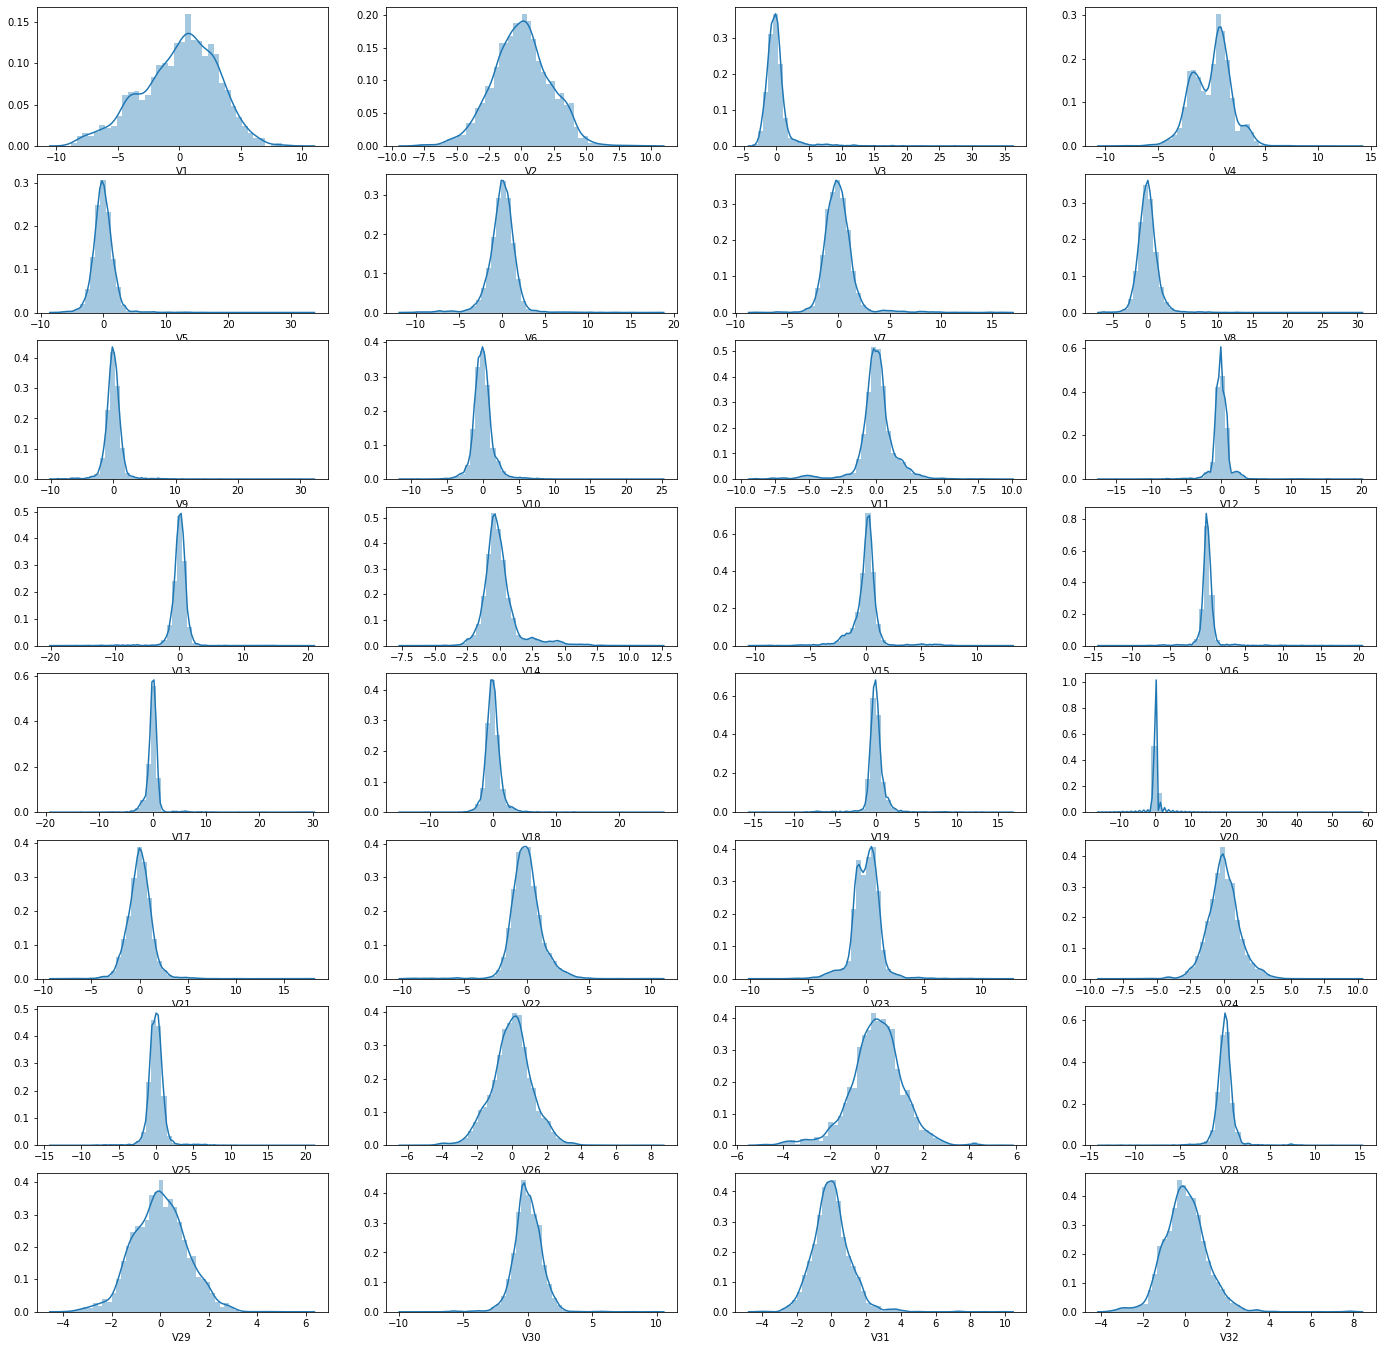

In [88]:
# Distribution of PCA train data
fig, axs = plt.subplots(8, 4, figsize=(24,24))
for ix, col in enumerate(pca_train_forty.columns):
    p0 = ix // 4
    p1 = ix % 4
    sns.distplot(pca_train_forty[col], ax = axs[p0, p1])
    axs[p0, p1].set(xlabel=col)

/Users/ajakaiye/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IndexError: index 4 is out of bounds for axis 0 with size 4

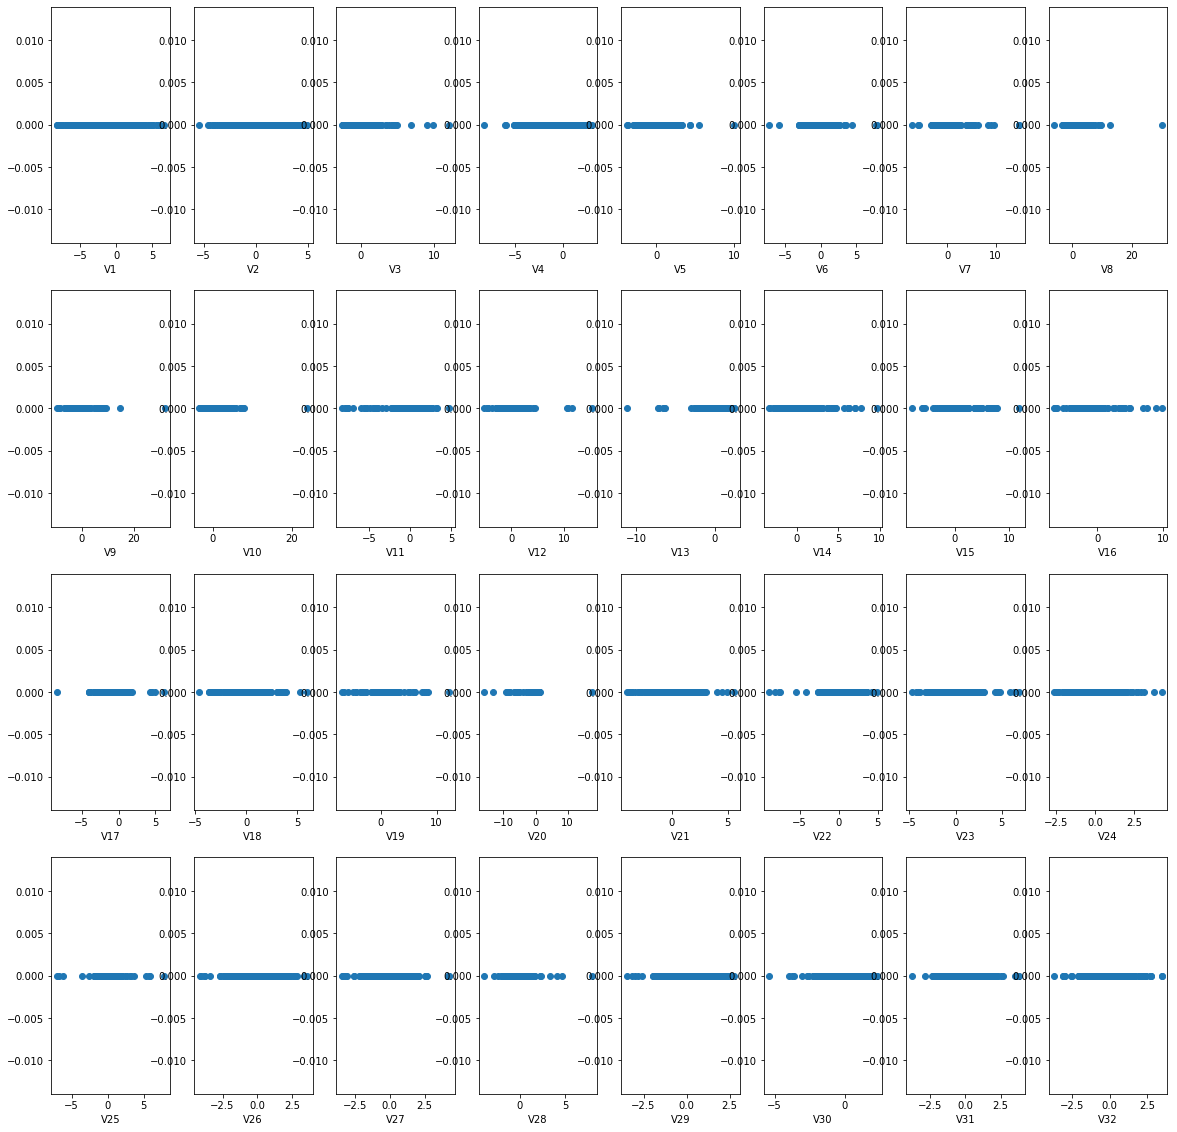

In [89]:
#Target variable relationship with other features

fig, axs = plt.subplots(4, 8, figsize=(20, 20))
for ix, feature in enumerate(pca_train_forty.columns):
    p0 = ix // 8
    p1 = ix % 8
    axs[p0, p1].scatter(pca_train_forty[feature], np.log(mail_target))
    axs[p0, p1].set(xlabel=feature )


Both group of graphs which depict the distributions and the features relationship with the target variable using the PCA version of the training data aren't surprising because the concept of PCA is based on standardize data which can't but be normal and on the other hand a scatter plot between a binary target variable and other features would appear flat which is in line with the sigmoid function. However we are at least confident that our PCA version of out data is in order, this is critical information before building any model of it.

## Model
Our model process would be iterative, to this end we would subject our data to various  classification algorithms as a means of understanding which algorithm best suit our data. To this end we would start with building a simple/basic model which will form the foundation for subsequent complex ones. Our approach would be as follows:
### Basic Model
* Logistic Regression

### Out of the bag model
* Support Vector Machine(SVM) Model
* Naive Bayes Model
* KN-Neighbor
* Decision Tree
* Random forest

Consequently base on our  chosen basis of evaluation, we would choose the two models with the highest scores. We would then go ahead and tune their respective hyper-parameters with the ultimate aim to improve on their scores. 
Depending on our result we may then proceed to one of the boosting algorithms

### Baseline Model

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, confusion_matrix, make_scorer

In [106]:
# create custom evaluation function
# def fbeta(y_true, pred_y):
#     func = fbeta_score(y_true, pred_y, beta=2)
#     return func
# fbet_score = make_scorer(fbeta)
fbeta2 = make_scorer(fbeta_score, beta=2)
strf = StratifiedKFold(n_splits=10,random_state=42, shuffle= True)

In [107]:
X = scaled_insure_train.as_matrix()
X_pc = scaled_insure_train.as_matrix()
Y = mail_target.values.ravel()
X_test = scaled_insure_test.as_matrix()
model = LogisticRegression()
score = cross_val_score(model, X, Y, cv=strf, scoring=fbeta2)
print('fbeta score === Logistic Regression', score.mean())


fbeta score === Logistic Regression 0.006993006993006994


In [108]:
best_score = 0
best_feature = None
best_model = None
for feature in scaled_insure_train.columns:
    X = scaled_insure_train[[feature]].as_matrix()
    model = LogisticRegression()
    scores = cross_val_score(model, X, Y, cv=strf, scoring=fbeta2)
    
    score = scores.mean()
    if score > best_score:
        best_score = score
        best_model = model
        best_feature  = feature

print('Mean fbeta score--- Logistic regression', best_score)

Mean fbeta score--- Logistic regression 0.0070672260513435226


### Out-of_bag Models with Imbalance Class
we would build the five models with the two version of our data

In [109]:
X_scaled = scaled_insure_train.as_matrix()
X_pca =  pca_train_forty.as_matrix()

X_scaled_test = scaled_insure_test.as_matrix()
X_pca_test = pca_test_forty.as_matrix()

In [111]:
X_variant = [X_scaled, X_pca]
X_names = ['X scaled only data', 'X with PCA']

for train_x,x_name in zip(X_variant, X_names):
    print('Data:', x_name)
    svc = SVC()
    svc_scores = cross_val_score(svc, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - SVC', svc_scores.mean())
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 scores - Random Forest!', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Naive Bayes:', naive_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_x, Y, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - KNN:',knn_score.mean() )
    
    print('\n')

Data: X scaled only data
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.13225175109618803
Mean Fbeta 2 scores - Random Forest! 0.0528655048314491
Mean Fbeta 2 score - Naive Bayes: 0.2478966810909867
Mean Fbeta 2 score - KNN: 0.0241742722902284


Data: X with PCA
Mean Fbeta 2 score - SVC 0.0
Mean Fbeta 2 score - Decision Tree: 0.14105156282016695
Mean Fbeta 2 scores - Random Forest! 0.037327491892497996
Mean Fbeta 2 score - Naive Bayes: 0.15048328385016754
Mean Fbeta 2 score - KNN: 0.024484508884206235




### Build Out-of-bag Model with Balance Class
Before evaluating the performance of the out-of-bag model and perform hyper-parameter tunning on the two best models,it would be instructive to know the impact of a balance class on the evaluation performance. We can only know when we correct the imbalance class and use same to build models

### Balance Imbalance Class with Synthetics Minority Oversampling Technique (SMOTE)
We decided on SMOTE because SMOTE is the popular choice in the community for better results


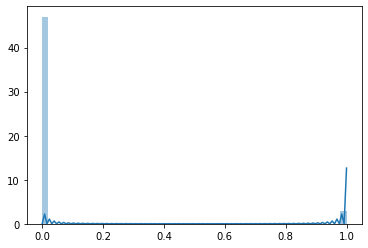

In [121]:
# clearly the class is imbalance
sns.distplot(Y);

In [123]:
# resample the sclaed portion of data set
from imblearn.over_sampling import SMOTE
method = SMOTE(kind='regular', random_state=42)
X_resample_scaled, y_resample = method.fit_sample(X_scaled,Y)


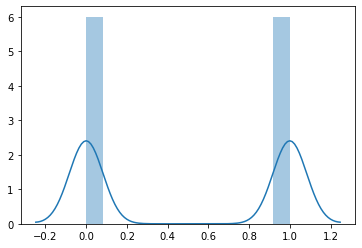

In [125]:
#class is now balance
sns.distplot(y_resample);

In [130]:
# resample PCA portion of data
X_resample_pca, y_resample = method.fit_sample(X_pca, Y)

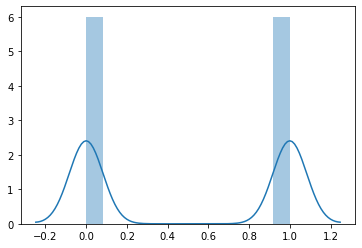

In [128]:
#balance class
sns.distplot(y_resample);

### Out-of-the-bag Model with Balance Class Data

In [132]:
X_variant = [X_resample_scaled, X_resample_pca]
X_names = ['X scaled only with resample data', 'X PCA with resample data']

for train_x,x_name in zip(X_variant, X_names):
    print('Data:', x_name)
    svc = SVC()
    svc_scores = cross_val_score(svc, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - SVC', svc_scores.mean())
    
    decision_tree = DecisionTreeClassifier()
    decision_tree_score = cross_val_score(decision_tree, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Decision Tree:', decision_tree_score.mean())
    
    random_forest = RandomForestClassifier()
    random_forest_score = cross_val_score(random_forest, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 scores - Random Forest!', random_forest_score.mean())
    
    naiv_bayes = GaussianNB()
    naive_score = cross_val_score(naiv_bayes, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - Naive Bayes:', naive_score.mean())
    
    knn = KNeighborsClassifier()
    knn_score = cross_val_score(knn, train_x, y_resample, cv=strf, scoring=fbeta2)
    print('Mean Fbeta 2 score - KNN:',knn_score.mean() )
    
    print('\n')

Data: X scaled only with resample data
Mean Fbeta 2 score - SVC 0.9415367294258725
Mean Fbeta 2 score - Decision Tree: 0.9337021841744008
Mean Fbeta 2 scores - Random Forest! 0.9463211952318259
Mean Fbeta 2 score - Naive Bayes: 0.8357897937248282
Mean Fbeta 2 score - KNN: 0.9503985378529378


Data: X PCA with resample data
Mean Fbeta 2 score - SVC 0.9561493800917431
Mean Fbeta 2 score - Decision Tree: 0.9014095394312411
Mean Fbeta 2 scores - Random Forest! 0.946901343634455
Mean Fbeta 2 score - Naive Bayes: 0.7463564412601642
Mean Fbeta 2 score - KNN: 0.9516811612339907




## Evaluation of Result